In [1]:
import pandas as pd
from pandas import Series,DataFrame

In [2]:
dcid_df = pd.read_csv('DCID.csv', encoding = "ISO-8859-1") # loading the dataset into a dataframe

In [4]:
#dcid_df

In [5]:
dcid_df.head() # show five rows (head)

,Cyberincidentnum,Dyadpair,StateA,StateB,Name,interactionstartdate,interactionenddate,interactiontype,method,APT,...,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45
0,1,2365,US,Russia,US govt employee in Georgia hacked,8/6/2008,8/12/2008,1,4.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2365,US,Russia,Iraq-Afghanistan Pentagon command hacked,11/26/2008,11/28/2008,3,4.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2365,US,Russia,"Power grid hacked, traced to Russia",8/24/2009,8/24/2009,1,4.2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2365,US,Russia,Reign malware campaign,01/02/2008,01/03/2011,3,3.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2365,US,Russia,QWERTY keystroke log,01/02/2008,11/03/2011,3,4.4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dcid_df.info() # information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 46 columns):
Cyberincidentnum        164 non-null int64
Dyadpair                164 non-null int64
StateA                  164 non-null object
StateB                  164 non-null object
Name                    164 non-null object
interactionstartdate    164 non-null object
interactionenddate      164 non-null object
interactiontype         164 non-null int64
method                  164 non-null float64
APT                     164 non-null int64
targettype              164 non-null int64
initiator               164 non-null int64
initiator objective     164 non-null int64
Political Objective     164 non-null object
objective success       164 non-null int64
3rdpartyinitator        164 non-null int64
3rdparty target         164 non-null int64
govtstatement           164 non-null int64
severity                164 non-null int64
damage type             164 non-null int64
Source                  164

In [7]:
dcid_df= dcid_df.drop(dcid_df.columns[22:], axis=1) # dropping the "Unnamed Columns"

In [13]:
dcid_df['interactiontype'].value_counts() # counts for interactiontype column

3    81
1    77
2     6
Name: interactiontype, dtype: int64

In [8]:
dcid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 22 columns):
Cyberincidentnum        164 non-null int64
Dyadpair                164 non-null int64
StateA                  164 non-null object
StateB                  164 non-null object
Name                    164 non-null object
interactionstartdate    164 non-null object
interactionenddate      164 non-null object
interactiontype         164 non-null int64
method                  164 non-null float64
APT                     164 non-null int64
targettype              164 non-null int64
initiator               164 non-null int64
initiator objective     164 non-null int64
Political Objective     164 non-null object
objective success       164 non-null int64
3rdpartyinitator        164 non-null int64
3rdparty target         164 non-null int64
govtstatement           164 non-null int64
severity                164 non-null int64
damage type             164 non-null int64
Source                  164

In [9]:
dcid_df['method'].value_counts() # counts for method column

3.0    73
1.0    26
2.0    25
4.2    19
4.4     9
4.3     8
4.1     4
Name: method, dtype: int64

In [10]:
dcid_df['initiator'].value_counts() # counts for initiator column

710    60
2      18
365    17
731    16
630    15
666     9
750     7
732     7
770     7
740     3
713     1
690     1
660     1
652     1
372     1
Name: initiator, dtype: int64

In [13]:
dcid_df["Political Objective"].str.contains("Espionage") # filter for string "Espionage" in Political Objective Columns

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7       True
8      False
9      False
10     False
11     False
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20      True
21     False
22     False
23     False
24      True
25      True
26     False
27     False
28     False
29     False
       ...  
134    False
135    False
136    False
137    False
138    False
139    False
140    False
141    False
142    False
143    False
144    False
145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157    False
158    False
159    False
160    False
161    False
162    False
163    False
Name: Political Objective, dtype: bool

In [16]:
dcid_df["initiator"][dcid_df["Political Objective"].str.contains("China")] 

26       2
36     710
43       2
52     710
54       2
67     710
142    732
Name: initiator, dtype: int64

In [19]:
dcid_esp= dcid_df[dcid_df["Political Objective"].str.contains("China")] # new dataframe for Espionage cases only

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

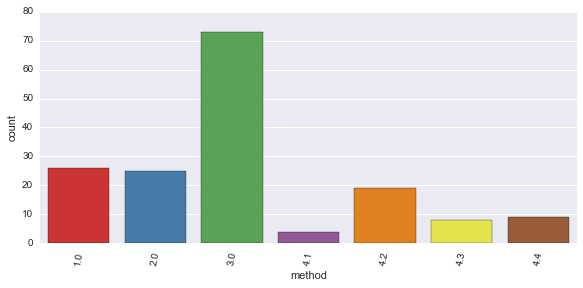

In [25]:
g= sns.factorplot('method',data=dcid_df, aspect=2.0, palette='Set1', kind='count')
g.set_xticklabels(rotation=80)

In [26]:
def cyber_method(entry):
    method = entry
    
    if method == 1:
        return 'Vandalism'
    elif method == 2:
        return 'DDOS'
    elif method == 3:
        return 'Intrusion'
    else: 
        return 'Infiltration'
    

In [27]:
dcid_df['Method'] = dcid_df['method'].apply(cyber_method)

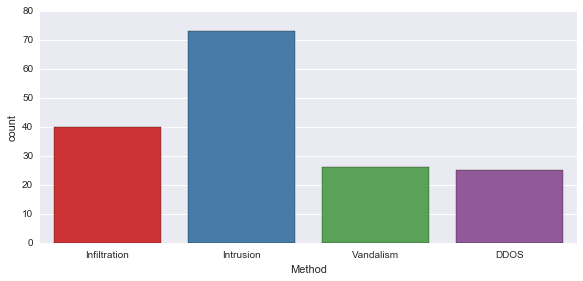

In [28]:
g= sns.factorplot('Method',data=dcid_df, aspect=2.0, palette='Set1', kind='count')


In [25]:
def initiator(x):
    attacker = x
    
    if attacker == 710:
        return 'China'
    elif attacker == 2:
        return 'USA'
    elif attacker == 365:
        return 'Russia'
    elif attacker == 731:
        return 'North Korea'
    elif attacker == 630:
        return 'Iran'
    elif attacker == 666:
        return 'Israel'
    elif attacker == 750:
        return 'India'
    elif attacker == 732:
        return 'South Korea'
    elif attacker == 770:
        return 'Pakistan'
    elif attacker == 740:
        return 'Japan'
    elif attacker == 713:
        return 'Taiwan'
    elif attacker == 690:
        return 'Kuwait'
    elif attacker == 660:
        return 'Lebanon'
    elif attacker == 652:
        return 'Syria'
    else: 
        return 'Georgia'


In [26]:
dcid_df['initiator'] = dcid_df['initiator'].apply(initiator)

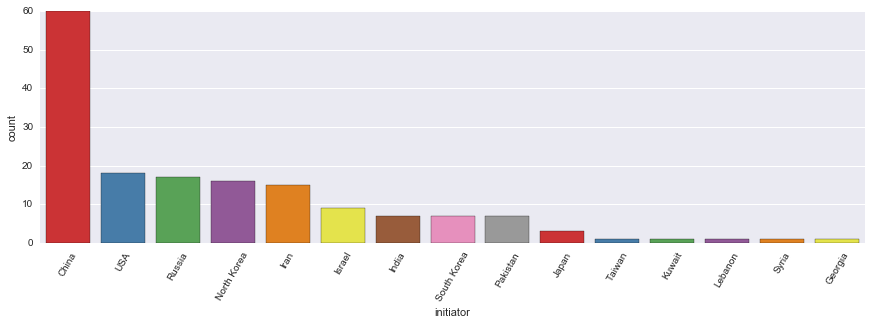

In [27]:
g2= sns.factorplot('initiator',data=dcid_df, order = ['China','USA','Russia',
                                                      'North Korea','Iran',
                                                      'Israel','India','South Korea',
                                                      'Pakistan','Japan','Taiwan','Kuwait',
                                                      'Lebanon', 'Syria','Georgia'],aspect=3.0, palette='Set1', kind='count')
g2.set_xticklabels(rotation=60)

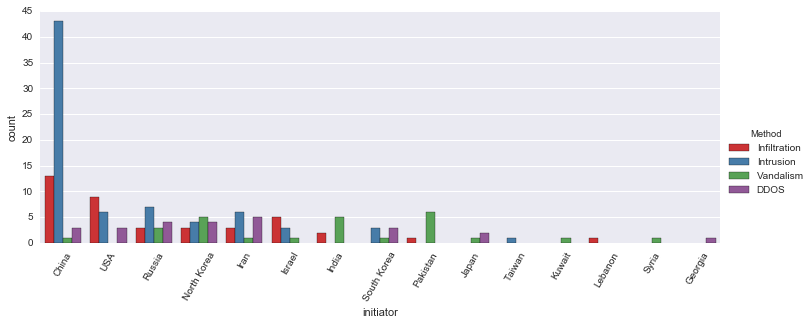

In [50]:
g3= sns.factorplot('initiator',data=dcid_df, hue='Method', order = ['China','USA','Russia',
                                                      'North Korea','Iran',
                                                      'Israel','India','South Korea',
                                                      'Pakistan','Japan','Taiwan','Kuwait',
                                                      'Lebanon', 'Syria','Georgia'],aspect=2.5, palette='Set1', kind='count')
g3.set_xticklabels(rotation=60)